<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 4 - Alcohol and Diabetes Risk: Insights for Singapore

> Authors: Chung Yau, Gilbert, Han Kiong, Zheng Gang
---

**Problem Statement:**  
In Singapore, the increasing prevalence of chronic diseases presents a pressing public health concern, underscoring the need for proactive intervention strategies. 

How can we identify individuals at high risk for chronic diseases based on their behavioral habits? By doing so, we can enable early detection and provide recommendations, fostering a proactive approach to preventing various chronic diseases.

  
**Target Audience:**  
Product team in Synapxe, in preparation for Healthier SG 2025 roadmap workshop. 

These are the notebooks for this project:  
 1. `01_Data_Collection_Food.ipynb`  
 2. `02_Data_Preprocessing.ipynb`   
 3. `03_FeatureEngineering_and_EDA.ipynb`
 4. `04_Data_Modelling.ipynb` 
 5. `05_Hyperparameter_Model Fitting_Evaluation.ipynb`
 6. `05a_Model_Pickling.ipynb`
 7. `06_Implementation_FoodRecommender.ipynb` 

 ---


# This Notebook : 03_FeatureEngineering and EDA
This notebook is to apply Feature Engineering before proceeding with Exploratory Data Analysis (EDA). 
EDA involves gaining insights into the dataset's characteristics, identifying patterns, and understanding its underlying structure. Appropriate Visualization will be generated for understanding and analyzing the data. This notebook will consist of 5 category:
1. Feature Engineering
2. Exploratory Data Analysis - Part 1
3. Data Cleaning 
4. Exploratory Data Analysis - Part 2
5. Export Cleaned Data

---
### Import libraries and Data

In [1]:
# standard imports
import pandas as pd


# visualisations
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
survey_df = pd.read_csv('../data/02_cleaned_data_forEDA.csv')

### **Data Dictionary**

To have the overview of data dictionary, refer to the following link to [Data Dictionary](../README.md)




### **1. Feature Engineering**

---

Before going into feature engineering, we will have an overview of the datasets and ensure that there is not empty cells.


#### **1.1 Overview of dataset**
---
Understand the size of the dataset (number of comments), the structure of the data (columns), and the types of variables present. 

Overview of the info of the datasets 

In [3]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 933204 entries, 0 to 933203
Data columns (total 31 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   heart_attack           933204 non-null  int64  
 1   stroke                 933204 non-null  int64  
 2   asthma                 933204 non-null  int64  
 3   skin_cancer            933204 non-null  int64  
 4   other_cancer           933204 non-null  int64  
 5   cpd_bronchitis         933204 non-null  int64  
 6   depression             933204 non-null  int64  
 7   kidney_disease         933204 non-null  int64  
 8   diabetes               933204 non-null  int64  
 9   sex                    933204 non-null  int64  
 10  martial                933204 non-null  int64  
 11  employment_status      933204 non-null  int64  
 12  blind                  933204 non-null  int64  
 13  diff_walking           933204 non-null  int64  
 14  occasion_drink_30days  933204 non-nu

Check null values

This is done to ensure that there are no null values which may affect EDA on the later part of the notebook.

In [4]:
#check any null values 
survey_df.isnull().sum()

heart_attack             0
stroke                   0
asthma                   0
skin_cancer              0
other_cancer             0
cpd_bronchitis           0
depression               0
kidney_disease           0
diabetes                 0
sex                      0
martial                  0
employment_status        0
blind                    0
diff_walking             0
occasion_drink_30days    0
high_bp                  0
heart_disease            0
arthritis                0
race                     0
age                      0
height                   0
education                0
smoker_status            0
one_alc_per_day          0
binge_drink              0
ave_drink_week           0
fruit                    0
vegetable                0
exercise_cat             0
high_cholesterol         0
weight                   0
dtype: int64

There are no null values, we will proceed with feature engineering. We will create 2 new columns 
1. BMI 
2. Chronic Disease

#### **1.2. Create BMI Column**

---

BMI is an estimate of body fat and a good gauge of your risk for diseases that can occur with more body fat. The higher your BMI, the higher your risk for certain diseases such as heart disease, high blood pressure and type 2 diabetes

Below is the formula to calculate BMI based on weight and height

BMI formula = weight / height <sup>2 </sup> (kg/m <sup> 2 </sup>)

In the code, the weight will be divided with 100 as the data record the weight with additional **00** for example 80 kg, data records as 8000.
Height will be converted from *cm* to *m*


In [5]:
survey_df['BMI'] = (survey_df['weight']/100)/((survey_df['height']/100)**2) 

Do a quick check that the new column is added

In [6]:
survey_df.head()

,heart_attack,stroke,asthma,skin_cancer,other_cancer,cpd_bronchitis,depression,kidney_disease,diabetes,sex,...,smoker_status,one_alc_per_day,binge_drink,ave_drink_week,fruit,vegetable,exercise_cat,high_cholesterol,weight,BMI
0,0,0,1,0,0,1,1,0,0,0,...,1,0,0,5.397605e-79,0,1,0,1,12701.0,40.086479
1,0,0,0,0,0,0,0,0,0,0,...,3,0,0,5.397605e-79,0,0,2,0,7484.0,25.005847
2,0,1,0,0,1,0,0,0,0,0,...,0,0,0,3.002370e+03,0,0,1,1,7167.0,22.120370
3,0,0,0,0,1,0,1,0,0,0,...,0,0,0,5.397605e-79,1,0,0,1,8165.0,28.252595
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,5.397605e-79,0,1,0,0,6441.0,24.242538


#### **1.3. Create Chronic Disease Column**

---

This part of the notebook is to create a new column for classification for chronic diseases. Diseases that are categorized as chronic diseases are as follows:

Source: [MOH Chronic Disease](https://www.moh.gov.sg/policies-and-legislation/chronic-disease-management-programme-(cdmp))

|ID|Description|
|---|---|
|CHCCOPD1|Chronic Obstructive Pulnomary Disease|
|ADDEPEV2|Depressive disorder|
|_DRDXAR1|Arthritis|
|CVDINFR4|Heart Attack|
|CVDSTRK3|Stroke|
|ASTHMA3|Asthma|
|DIABETE3|Diabetes|
|CHCKIDNY|Kidney Disease|
|_MICHD|Coronary Heart Disease|

Chronic disease `CD` column will be identified as follows:
- 1 : Have chronic disease
- 0 : Do not have chronic disease

In [7]:
#create list of chronic disease
chronic_disease_list = survey_df[['cpd_bronchitis', 'depression', 'arthritis', 'heart_attack', 'stroke', 'asthma', 'diabetes', 'kidney_disease', 'heart_disease']]


In [8]:
#create datasets for chronic diseases
cd = []
for index, row in chronic_disease_list.iterrows():
    if row.any() == True:
        cd.append(1)
    else:
        cd.append(0)

survey_df['CD'] = pd.DataFrame(cd)

Check the datasets after adding new column 

In [9]:
survey_df.head()

,heart_attack,stroke,asthma,skin_cancer,other_cancer,cpd_bronchitis,depression,kidney_disease,diabetes,sex,...,one_alc_per_day,binge_drink,ave_drink_week,fruit,vegetable,exercise_cat,high_cholesterol,weight,BMI,CD
0,0,0,1,0,0,1,1,0,0,0,...,0,0,5.397605e-79,0,1,0,1,12701.0,40.086479,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,5.397605e-79,0,0,2,0,7484.0,25.005847,0
2,0,1,0,0,1,0,0,0,0,0,...,0,0,3.002370e+03,0,0,1,1,7167.0,22.120370,1
3,0,0,0,0,1,0,1,0,0,0,...,0,0,5.397605e-79,1,0,0,1,8165.0,28.252595,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,5.397605e-79,0,1,0,0,6441.0,24.242538,1


### **2 Exploratory Data Analysis (EDA) - Part 1**
---

In this part of the notebook, we will focus on 

#### **2.1. Summary Statistics**

---

In [10]:
#transpose to allow overview of the whole statistic
survey_df.describe().T

,count,mean,std,min,25%,50%,75%,max
heart_attack,933204.0,0.058666,0.234998,0.000000,0.000000,0.000000e+00,0.000000,1.000000
stroke,933204.0,0.041424,0.199269,0.000000,0.000000,0.000000e+00,0.000000,1.000000
asthma,933204.0,0.135638,0.342404,0.000000,0.000000,0.000000e+00,0.000000,1.000000
skin_cancer,933204.0,0.093551,0.291203,0.000000,0.000000,0.000000e+00,0.000000,1.000000
other_cancer,933204.0,0.097059,0.296038,0.000000,0.000000,0.000000e+00,0.000000,1.000000
cpd_bronchitis,933204.0,0.081627,0.273796,0.000000,0.000000,0.000000e+00,0.000000,1.000000
depression,933204.0,0.192410,0.394194,0.000000,0.000000,0.000000e+00,0.000000,1.000000
kidney_disease,933204.0,0.033823,0.180774,0.000000,0.000000,0.000000e+00,0.000000,1.000000
diabetes,933204.0,0.136960,0.343806,0.000000,0.000000,0.000000e+00,0.000000,1.000000
sex,933204.0,0.415984,0.492891,0.000000,0.000000,0.000000e+00,1.000000,1.000000


Looking at the summary statistics, we will further explore features with continuous data to identify if there are any outliers. Continuous data lists are as follows: 

|ID|Description|
|---|---|
|ave_drink_week|Calculated total number of alcoholic beverages consumed per week|
|height|Reported height in meters|
|weight|Reported weight in kg|
|BMI|Body Mass Index calculated from weight and height|

#### **2.2 EDA - Heatmap**

Utilizing a heatmap to visualize the correlation coefficients among all features in a dataset offers a practical and insightful approach to understanding the relationships between variables. By representing correlation coefficients as a color-coded matrix, the heatmap provides an intuitive overview of how each feature relates to every other feature. Higher positive number indicates stronger positive correlations, while higher negative number indicates stronger negative correlation. By observing the overall structure of the heatmap, researchers can gain valuable insights into which variables might have the most significant impact on the target variable or which pairs of variables exhibit strong relationships

This part of the notebook is to have an overview of correlation coefficient among all features in the datasets

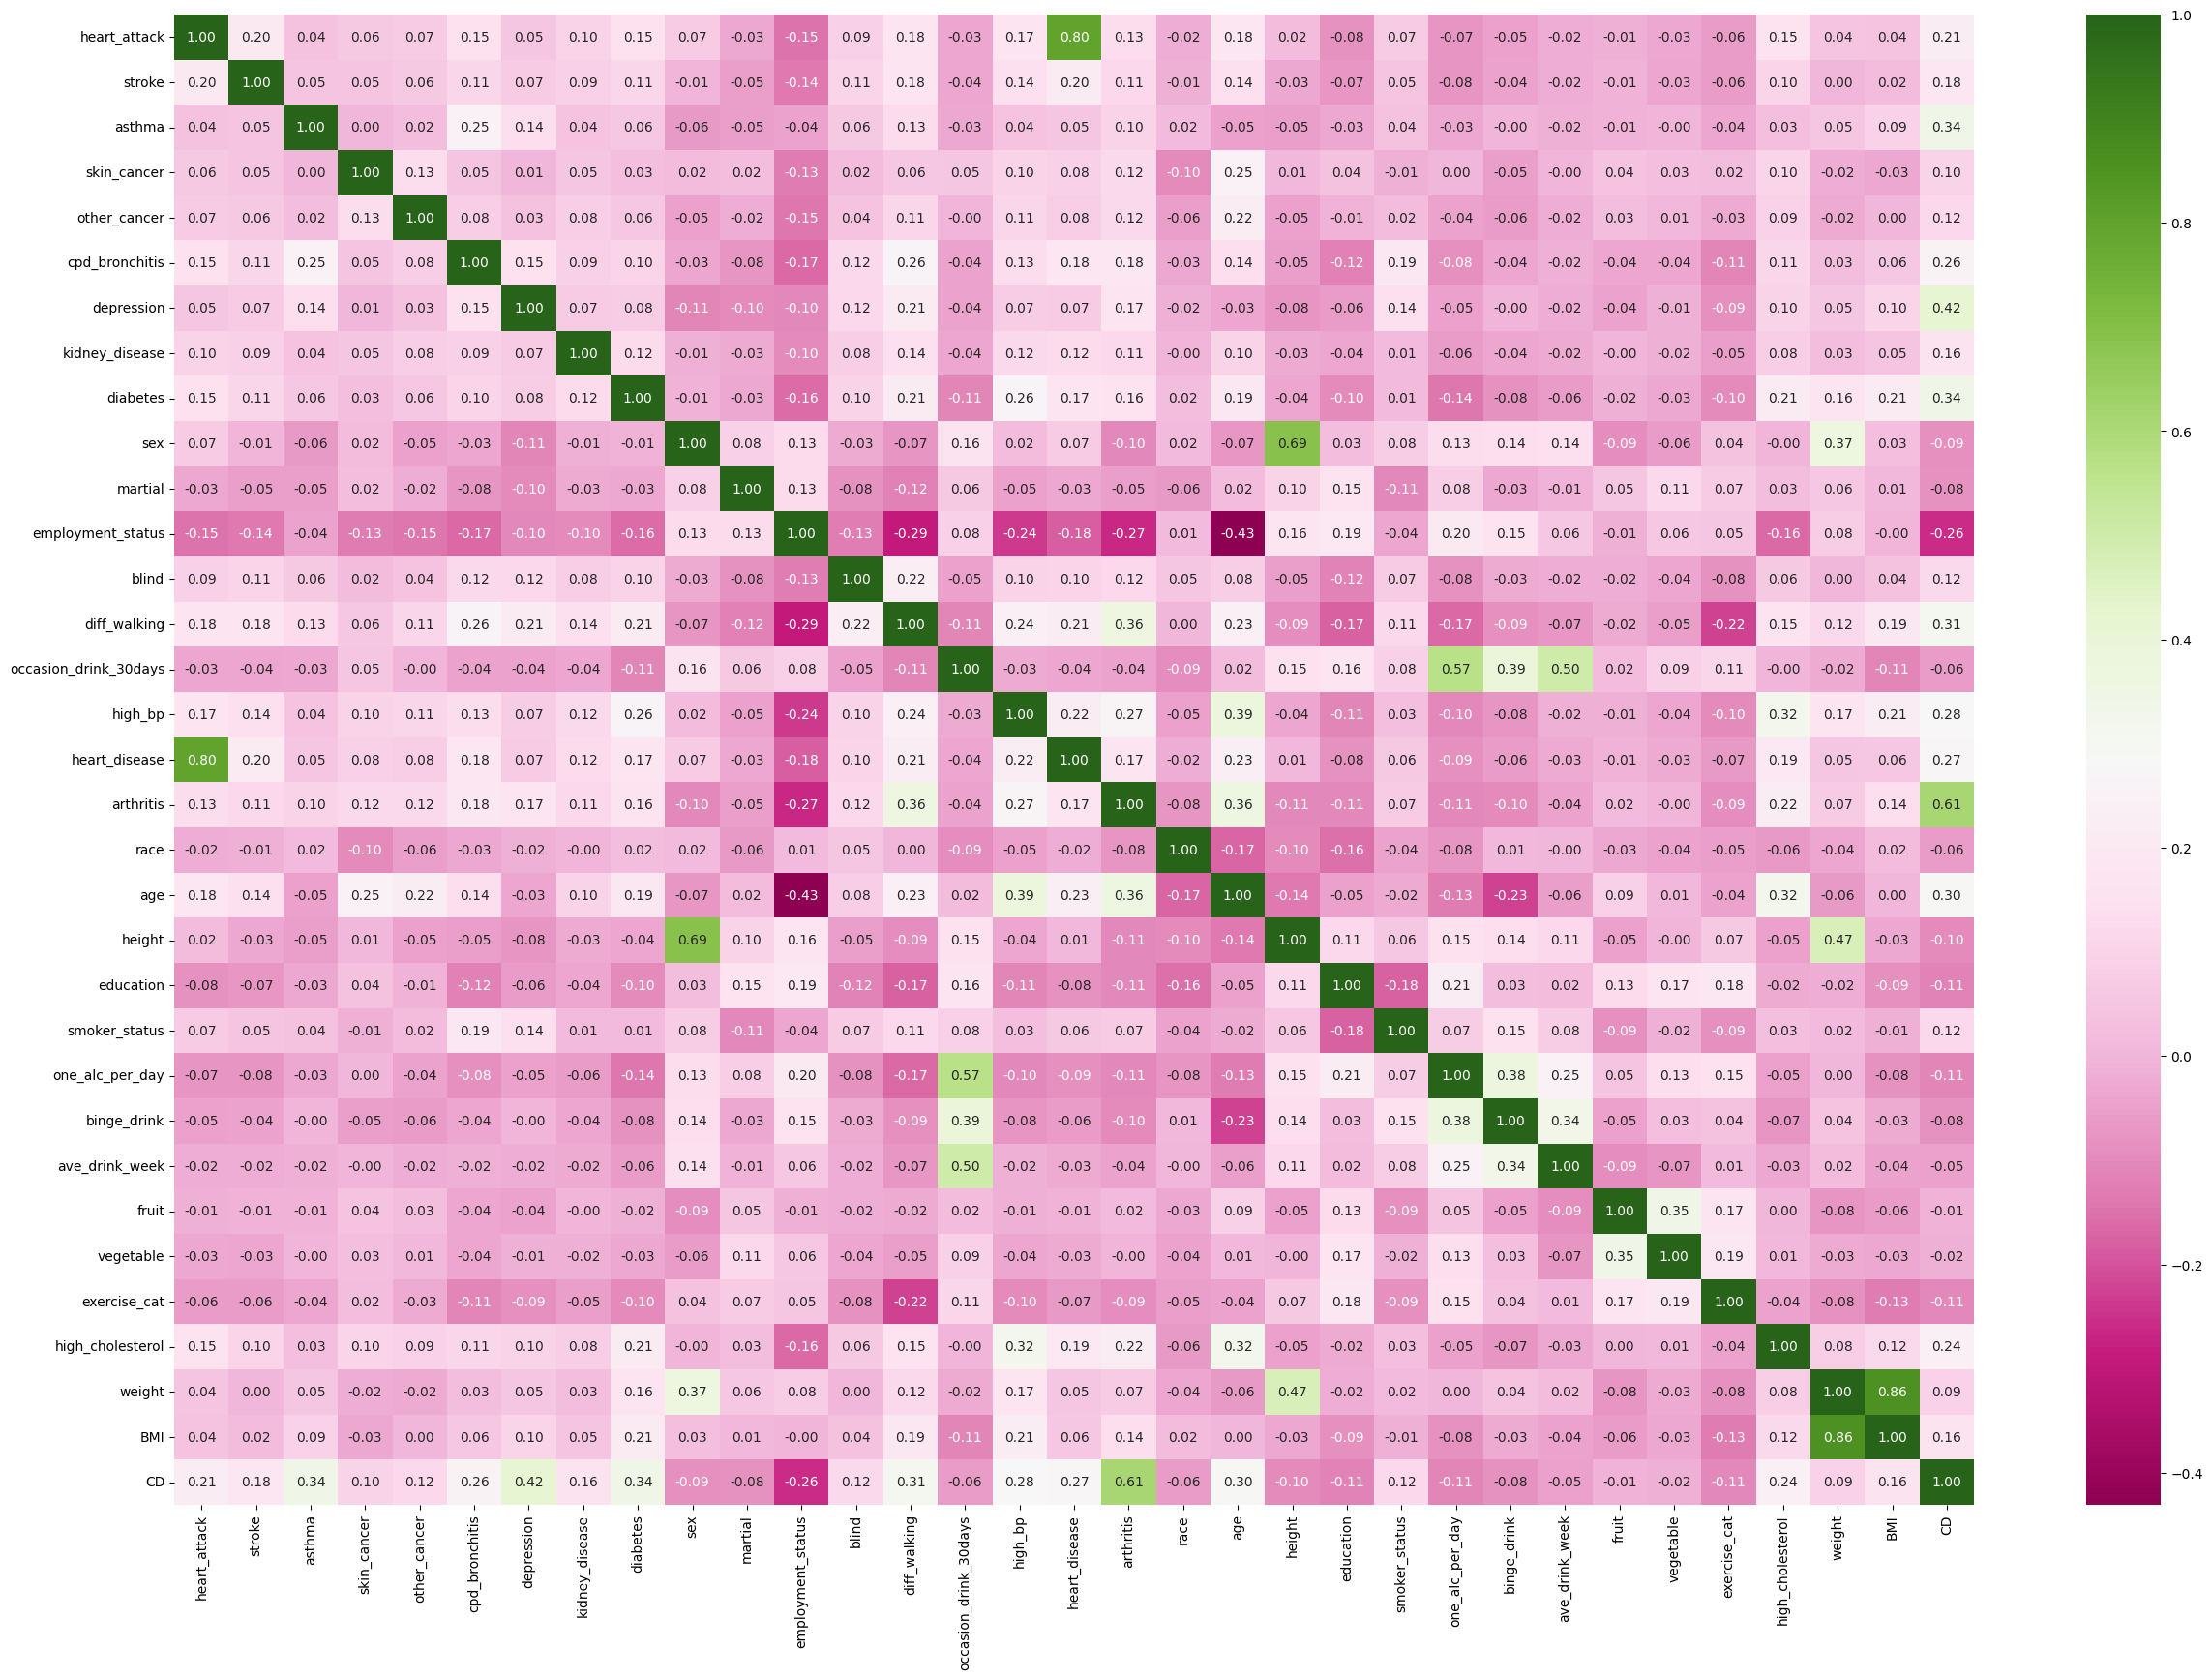

In [11]:
#define plot size
plt.figure(figsize=(30,20));

#plot heatmap
sns.heatmap(survey_df.corr(), annot= True, fmt = '0.2f', cmap = 'PiYG');

#### **2.3 EDA -  Percentage of Population with Chronic Disease by Race**

---

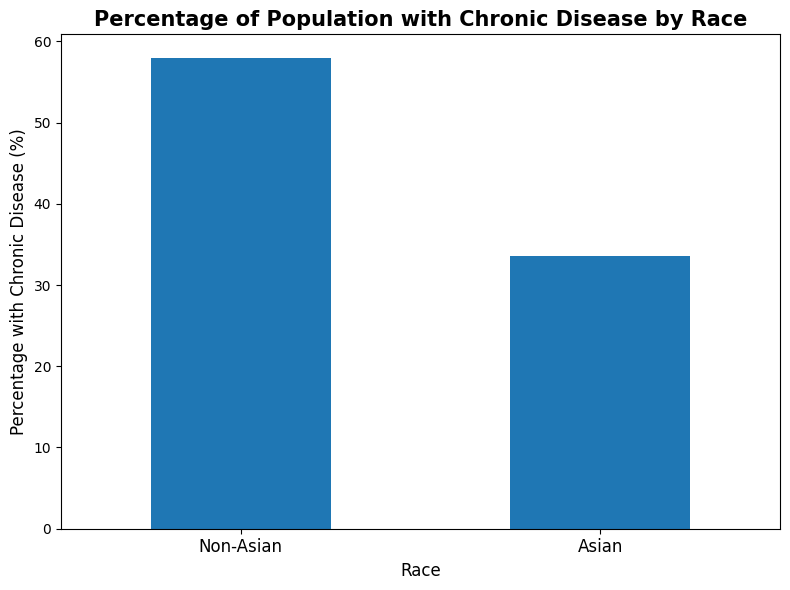

In [12]:
#set asian as 1, other race as 0
survey_df["Asian"] = survey_df["race"].map(lambda x: 1 if x ==4 else 0)

# Assuming survey_df is your DataFrame containing the data
# Calculate the percentage of individuals with CD for each _RACE category
race_cd_percentage = survey_df.groupby('Asian')['CD'].mean() * 100

# Plotting
plt.figure(figsize=(8, 6))
race_cd_percentage.plot(kind='bar')
plt.title('Percentage of Population with Chronic Disease by Race', weight = "bold", fontsize = 15)
plt.xlabel('Race',fontsize=12)
plt.ylabel('Percentage with Chronic Disease (%)',fontsize=12)
plt.xticks([0, 1], ['Non-Asian', 'Asian'], rotation=0,fontsize=12)  # Label x-axis ticks
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

We're narrowing down our focus to Asian individuals, who make up 30% of our dataset and have a higher rate of chronic diseases. By excluding non-Asian individuals, who account for 70% and have a lower rate of chronic diseases (60%), we can better understand health issues within the Asian community. This approach helps us avoid mixing different groups and lets us dig deeper into factors affecting chronic diseases among Asians, which we assume is related to Singapore

#### **2.4. EDA - BMI of Race**
---
We will analyze how BMI is distributed among all races in the datasets 

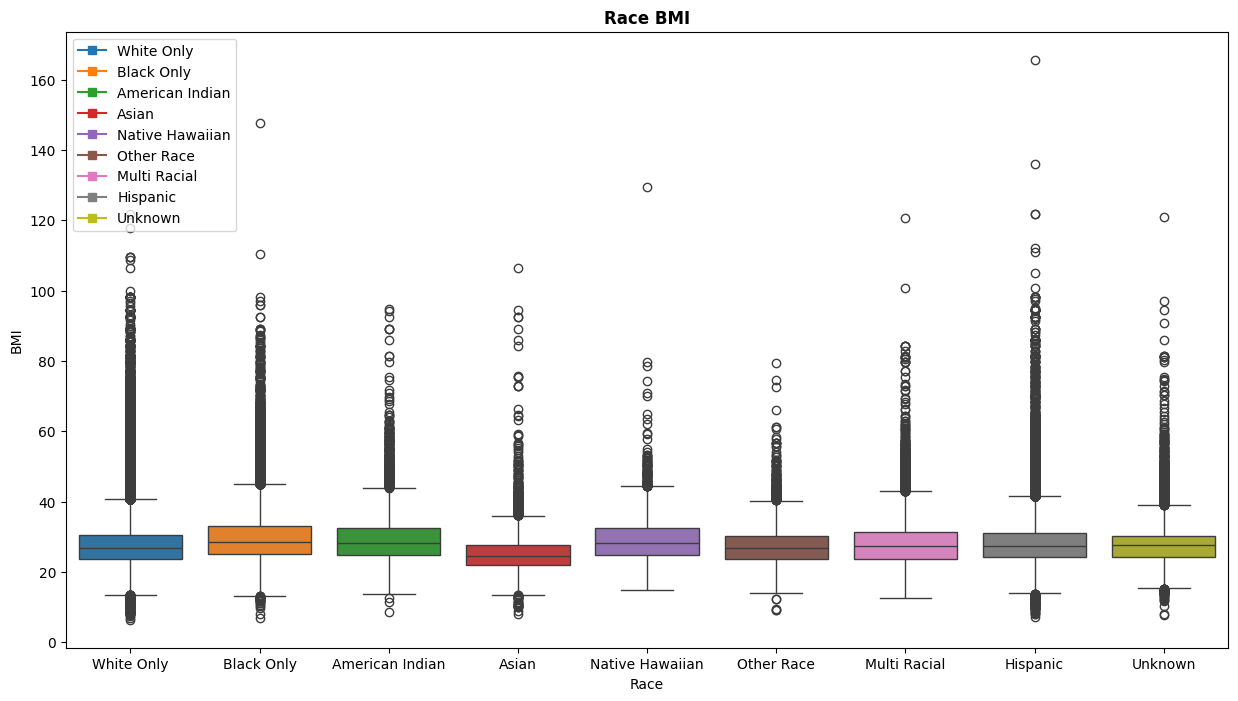

In [13]:
race_labels = ['White Only', 'Black Only','American Indian','Asian','Native Hawaiian','Other Race','Multi Racial','Hispanic','Unknown']
colors = ['C0', 'C1', 'C2','C3','C4','C5','C6','C7','C8']

plt.figure(figsize = (15,8))
sns.boxplot(x = 'race', y = 'BMI', data = survey_df, hue = 'race', palette= colors)
plt.xticks(ticks=list(range(0,9)), labels = race_labels);
plt.xlabel("Race")
plt.ylabel("BMI")
plt.title("Race BMI", weight = 'bold')

#create legend 
legend_elements = []
for color, label in zip(colors,race_labels):
    line = plt.Line2D([0],[0], marker = 's', color = color, label = label)
    legend_elements.append(line)

plt.legend(handles=legend_elements, loc='upper left');


The analysis of BMI data across different races reveals that individuals of Asian descent exhibit the lowest median BMI compared to other racial groups. This insight is drawn from a comprehensive examination of boxplots representing BMI distributions among various ethnicities. The median BMI for the Asian population stands out as notably lower when compared to those of other racial backgrounds

#### **2.5. Create Dataset to `asian` only**

---

As we are creating a predictive model to be used in Singapore, we will filter out the US survey data based on `asian` race only. Our assumption is asian generally have similar kind of lifestyle and diet habit. The dataset will be defined as `asian_df`

In [14]:
asian_df = survey_df.loc[(survey_df['race'] == 4),:]

From this part onwards, we will only use `asian_df` data

#### **2.6. Analysing Outliers**
---

These are the lists of boxplot that we will analyze to identify the outliers:
|ID|Description|
|---|---|
|_DRNKWEK|Calculated total number of alcoholic beverages consumed per week|
|HTM4|Reported height in meters|
|WTKG3|Reported weight in kg|
|BMI|Body Mass Index calculated from weight and height|

We will do a visualization to identify if there are any outliers


#### **2.6.1. EDA - Height and Weight Data**

---


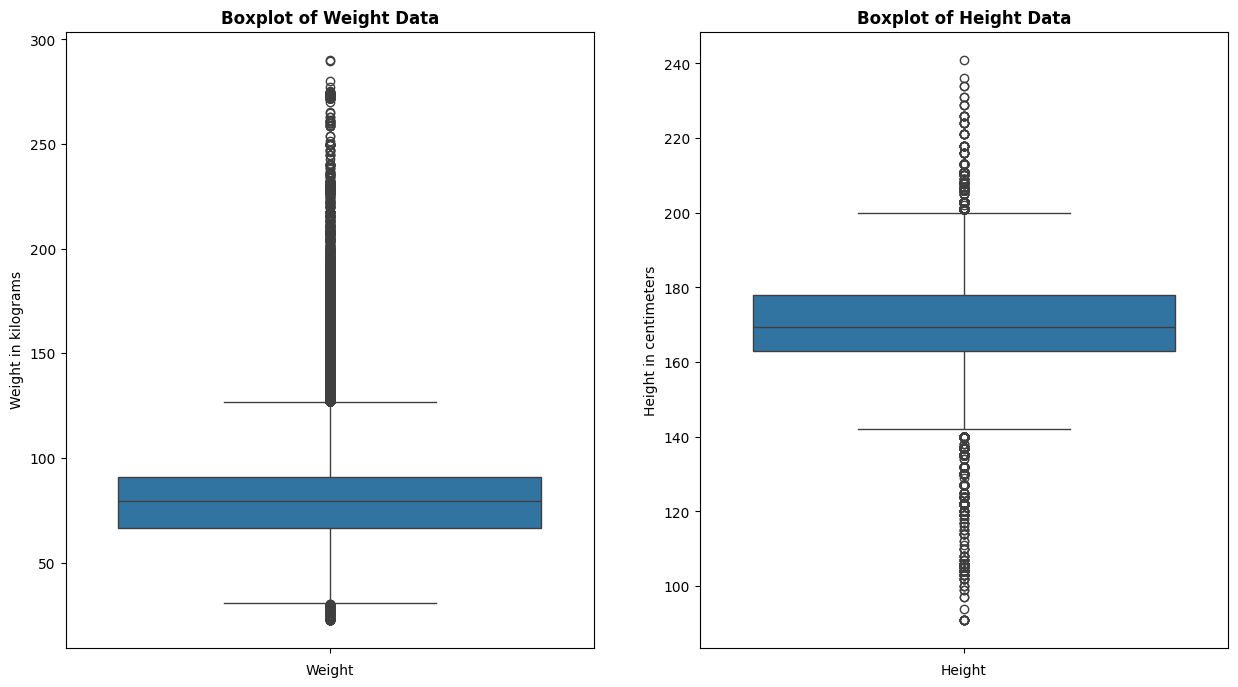

In [15]:
fig, ax = plt.subplots(1,2,figsize=(15,8))
#boxplot weight
sns.boxplot(survey_df['weight'] / 100, ax=ax[0])  # Assuming 'weight' is in grams and needs conversion to kilograms
ax[0].set_title("Boxplot of Weight Data", weight='bold')
ax[0].set_ylabel("Weight in kilograms")
ax[0].set_xlabel("Weight")

# Boxplot for height
sns.boxplot(survey_df['height'], ax=ax[1])
ax[1].set_title("Boxplot of Height Data", weight='bold')
ax[1].set_ylabel("Height in centimeters")
ax[1].set_xlabel("Height")

plt.show()

Looking at both weight and height boxplot, there are multiple outliers. We will verify if this data is correctly input.

With reference to the article below, the height upper bound outlier could be from NBA players. There are NBA players that are more than 200cm height (source 1). While for lower bound outlier, there are indeed record on height less than 100 cm (source 2)
- Source 1: [NBA Player Bio](https://www.nba.com/stats/players/bio)
- Source 2: [Shortest People](https://en.wikipedia.org/wiki/List_of_the_verified_shortest_people)

Addressing the weight outliers, there are historical records of individual with weight of more than 250 kg.
- Source: [List of Heaviest People](https://en.wikipedia.org/wiki/List_of_heaviest_people)

We will keep these outliers data for BMI calculations and further analyze if there are outliers on the BMI plot 


#### **2.6.2. EDA - BMI for Asian**
---

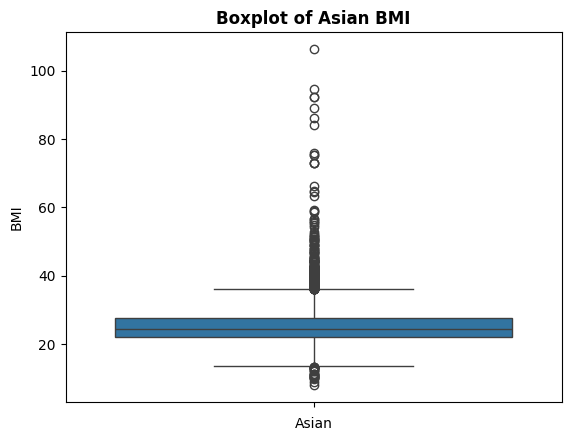

In [16]:
sns.boxplot(asian_df['BMI']);
plt.title('Boxplot of Asian BMI', weight = 'bold');
plt.xlabel('Asian');


We can see from the BMI boxplot that there are a lot of outlier both on the upper and lower side of the boxplot. We will remove these outliers for the modelling purpose. The outliers below lower quartile 25% and above upper quartile of 75% will be removed.

#### **2.6.3. EDA - Total number of alcoholic beverages consumed per week**
---

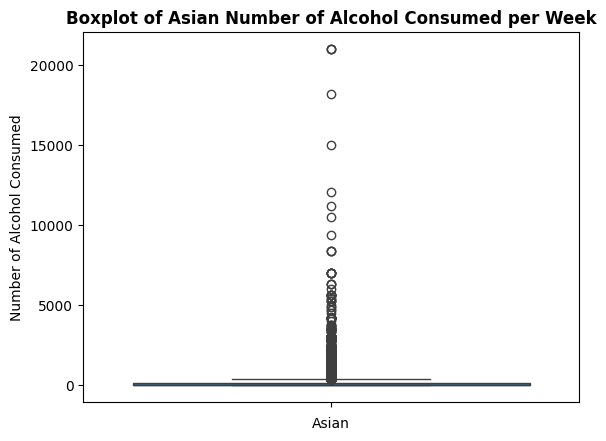

In [17]:
sns.boxplot(asian_df['ave_drink_week']);
plt.title('Boxplot of Asian Number of Alcohol Consumed per Week', weight = 'bold');
plt.xlabel('Asian');
plt.ylabel("Number of Alcohol Consumed");

There are a lot of outliers identified on number of alcohol consumed per week. We will remove the outliers for modelling purposes by removing those data below lower quartile of 25% and upper quartile of 75%. 

### **3. Data Cleaning - Remove Outliers**

---

This part of the notebook is to remove the outliers.
In the context of boxplots, outliers refer to data points that fall significantly below the lower quartile (Q1) or above the upper quartile (Q3) of the data distribution. These outliers can skew the interpretation of the data and affect the accuracy of statistical analysis and modeling. By removing outliers that fall below Q1 or above Q3, we aim to create a cleaner and more representative dataset for modeling purposes. This process helps ensure that the statistical models capture the typical patterns and relationships in the data without being unduly influenced by extreme values. Removing outliers below Q1 and above Q3 aligns with standard practices in data preprocessing to enhance the reliability and validity of subsequent analyses and interpretations.


We will only clean `asian_df` datasets since we will only focus on this race.

In [18]:
#define function to remove outliers
def remove_outliers_iqr(df, column, threshold=1.5):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - threshold * iqr
    upper_bound = q3 + threshold * iqr
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

#remove BMI outliers
asian_df_cleaned = remove_outliers_iqr(asian_df, column = 'BMI')
#remove number of alcohol consumed per week outliers 
asian_df_cleaned = remove_outliers_iqr(asian_df, column = 'ave_drink_week')

The cleaned data with removed outliers is stored under `asian_df_cleaned` variable. On the remaining part of the EDA, we will use dataset 

### **4. Exploratory Data Analysis - Part 2**

---
This part of EDA will focus only on `asian_df_cleaned` datasets

#### **4.1 EDA - BMI of Asian**
---

We will create a pie chart taken from the source below to compare the BMI between US asian and singapore. The purpose is to verify if the US asian BMI data have the same trend as Singapore BMI statistics 

Source : [National Population Health Survey 2020](https://www.moh.gov.sg/docs/librariesprovider5/default-document-library/nphs-2020-survey-report.pdf?sfvrsn=5dd7829e_0)

With reference to page 79 of the document, we will categorize BMI into 4 class:
1. Low risk: 18.5 - 22.9
2. Moderate risk: 23 - 27.4
3. High risk : &ge; 27.5

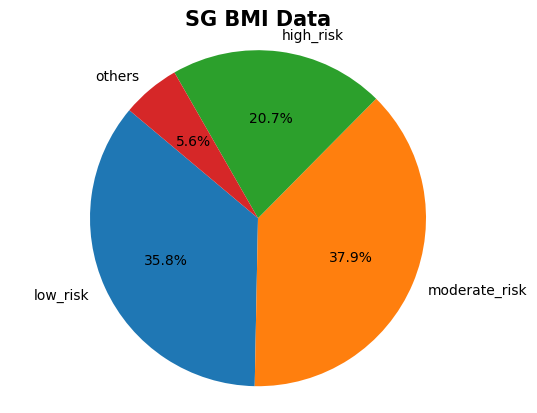

In [19]:
sg_data = {'low_risk' : 0.358,
           'moderate_risk' : 0.379,
           'high_risk': 0.207,
           'others': 0.056
}

plt.pie(sg_data.values(), labels = sg_data.keys(), autopct='%1.1f%%', startangle=140);
plt.title('SG BMI Data', weight = 'bold', fontsize = 15);
plt.axis('equal');

Create a pie chart from `asian_df_cleaned` datasets based on BMI. The BMI classes and parameters referenced from above

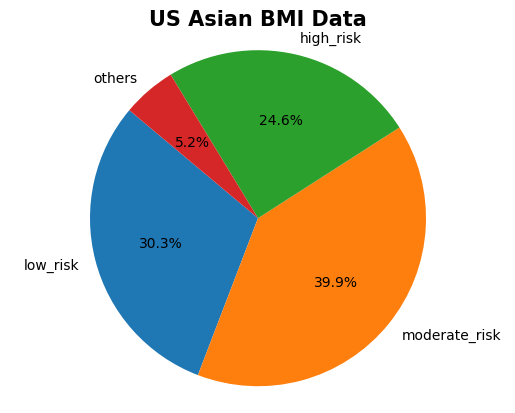

In [20]:
low_risk = asian_df_cleaned[(asian_df_cleaned['BMI'] >= 18.5) & (asian_df_cleaned['BMI'] <= 22.9)]
moderate_risk = asian_df_cleaned[(asian_df_cleaned['BMI'] >= 22.9) & (asian_df_cleaned['BMI'] <= 27.4)]
high_risk = asian_df_cleaned[(asian_df_cleaned['BMI'] >= 27.5)]

asian_df_data = {'low_risk' : len(low_risk),
                 'moderate_risk' : len(moderate_risk),
                 'high_risk' : len(high_risk),
                 'others' : len(asian_df_cleaned)-len(low_risk) - len(moderate_risk) - len(high_risk)
}

plt.pie(asian_df_data.values(), labels = asian_df_data.keys(), autopct='%1.1f%%', startangle=140);
plt.title('US Asian BMI Data', weight = 'bold', fontsize = 15)
plt.axis('equal');

Comparing the 2 pie chart between US asian and Singapore BMI, there is no significant difference(around 5%) among each of the classes. With the insignificant difference, we asssume that we can use this datasets as a reference to predict if Singaporean risk of chronic disease

#### **4.2 EDA - Chronic Diseases Count and Proportion**
---

Purpose of this part is to identify the proportion of recorded asian with **chronic disease** and **no chronic disease**

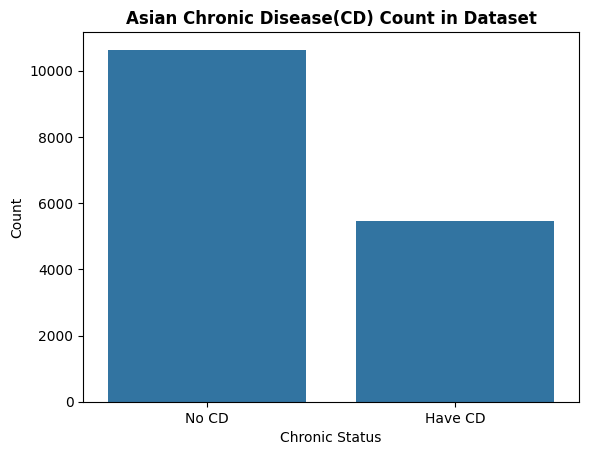

In [21]:
sns.barplot(asian_df_cleaned['CD'].value_counts());
plt.title("Asian Chronic Disease(CD) Count in Dataset", weight = 'bold')
plt.xlabel("Chronic Status");
plt.ylabel("Count");
plt.xticks(ticks = [0,1], labels = ['No CD','Have CD']);

*Note : The bar plot will be elaborated together with the pie chart*

Plot the proportion in form of pie chart

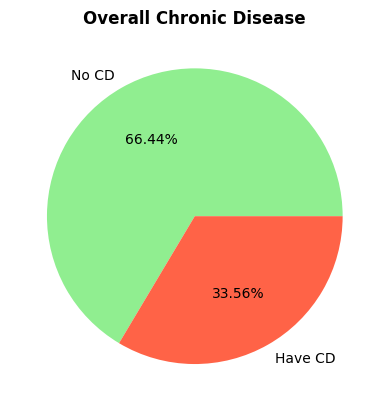

In [22]:
colors = ['lightgreen','tomato']

plt.pie(asian_df['CD'].value_counts(), labels = ['No CD', 'Have CD'], autopct = '%.2f%%', colors = colors, );
plt.title("Overall Chronic Disease", weight = 'bold');

Looking at the 2 graph above, there are imbalanced class of individuals that have **Chronic Diseases** and **No Chronic Diseases**. The proportion of asian with CD is 33.5% while asian with no CD is 66.5%. The datasets will be further processed to balance out the class on part 4 of the notebook, before modelling.



#### **4.3 EDA - Chronic Disease Breakdown**
---

We will visualize the distribution of difference kinds of chronic diseases on Asian

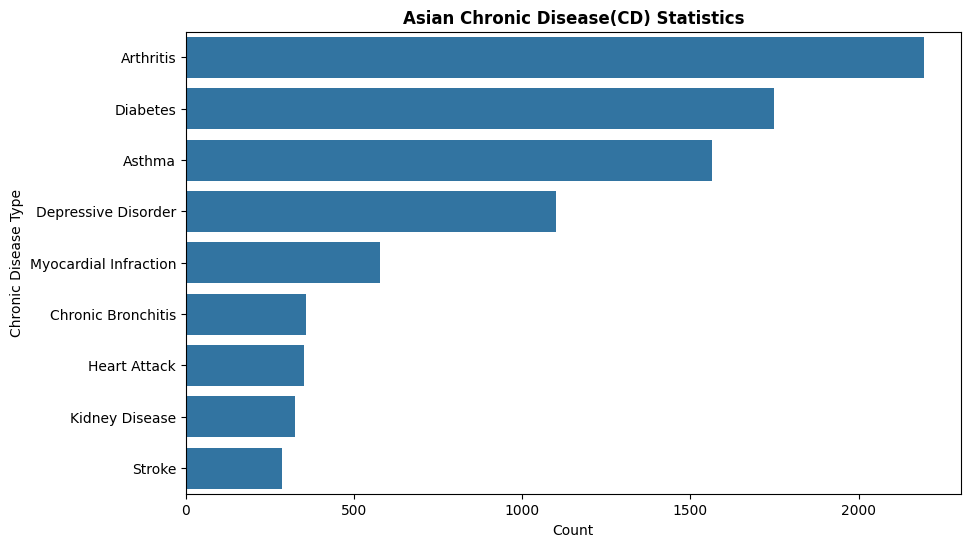

In [23]:
asian_chronic_disease_list = asian_df_cleaned[[
    'cpd_bronchitis',  
    'depression',      
    'arthritis',       
    'heart_attack',    
    'stroke',         
    'asthma',        
    'diabetes',       
    'kidney_disease',  
    'heart_disease'    
]]


plt.figure(figsize=(10,6))
sns.barplot(x = asian_chronic_disease_list.sum().sort_values(ascending=False), y = asian_chronic_disease_list.columns);
plt.title("Asian Chronic Disease(CD) Statistics", weight = 'bold')
plt.ylabel("Chronic Disease Type");
plt.xlabel("Count");
plt.yticks(ticks = range(0,9),
           labels = ['Arthritis','Diabetes','Asthma','Depressive Disorder','Myocardial Infraction','Chronic Bronchitis','Heart Attack','Kidney Disease','Stroke']);

From the Asian Chronic Diseases Statistics, the top 3 highest counts are:
1. Arthritis
2. Diabetes
3. Asthma



#### **4.4 EDA - Lifestyle Smoking and Drinking**

---

We will analyze the relationship between smoking and drinking

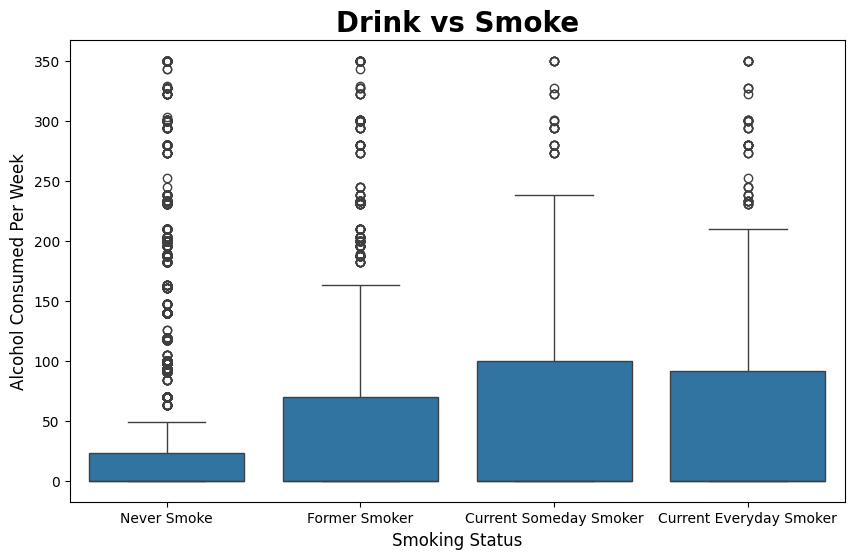

In [24]:
plt.figure(figsize=(10,6))
sns.boxplot(x='smoker_status', y='ave_drink_week', data=asian_df_cleaned)
plt.title("Drink vs Smoke", weight = 'bold', fontsize = 20);
plt.xlabel("Smoking Status", fontsize = 12);
plt.ylabel("Alcohol Consumed Per Week", fontsize = 12);
plt.xticks(ticks = range(0,4), labels = ['Never Smoke', 'Former Smoker', 'Current Someday Smoker', 'Current Everyday Smoker']);

Observing the plot, it becomes evident that individuals who smoke tend to consume more alcohol compared to those who never smoke. This inference is drawn from the visual depiction of the data, which likely exhibits higher alcohol consumption levels among smokers relative to non-smokers. This explains that bad lifestyle habits (smoking and drinking) tends to come together 

##### **4.5. EDA - Age Group with Chronic Disease**

---

We will analyze on how chronic diseases are distributed across different age groups

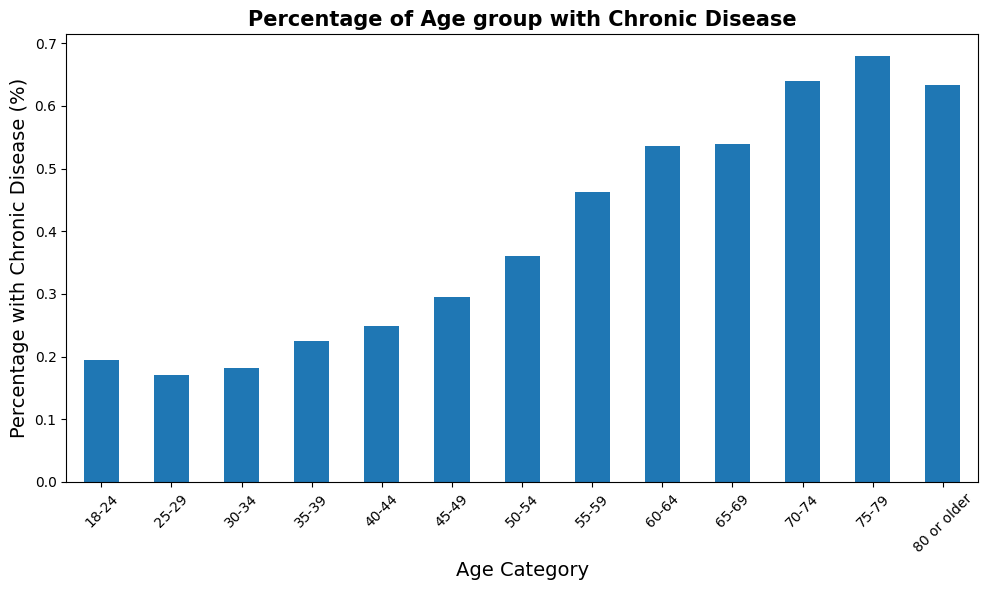

In [25]:
# Assuming survey_df is your DataFrame containing the data
# Calculate the percentage of individuals with CD for each _RACE category
smoker_asthma = asian_df_cleaned.groupby('age')['CD'].mean()

# Plotting
plt.figure(figsize=(10, 6))
smoker_asthma.plot(kind='bar')
plt.title('Percentage of Age group with Chronic Disease', weight = 'bold', fontsize = 15)
plt.xlabel('Age Category', fontsize = 14)
plt.ylabel('Percentage with Chronic Disease (%)', fontsize = 14)
plt.xticks(rotation=0)  # Label x-axis ticks

plt.xticks(rotation=45, ticks = range(0,13), 
           labels = ['18-24','25-29','30-34'
                     ,'35-39','40-44','45-49'
                     ,'50-54','55-59','60-64'
                     ,'65-69','70-74','75-79'
                     ,'80 or older'])  
plt.tight_layout()
plt.show()


The bar plot illustrates a notable trend: as age increases, the percentage of individuals with chronic diseases tends to rise. This observation suggests a correlation between aging and susceptibility to chronic health conditions. Indeed, the data underscores the notion that older individuals are more prone to developing chronic diseases compared to younger age groups.

#### **4.6. EDA - Smoking/Non Smoking to Chronic Disease by Age Group** 
---

We will analyze on how smoking/ non smoking contributes to chronic disease based on each age group

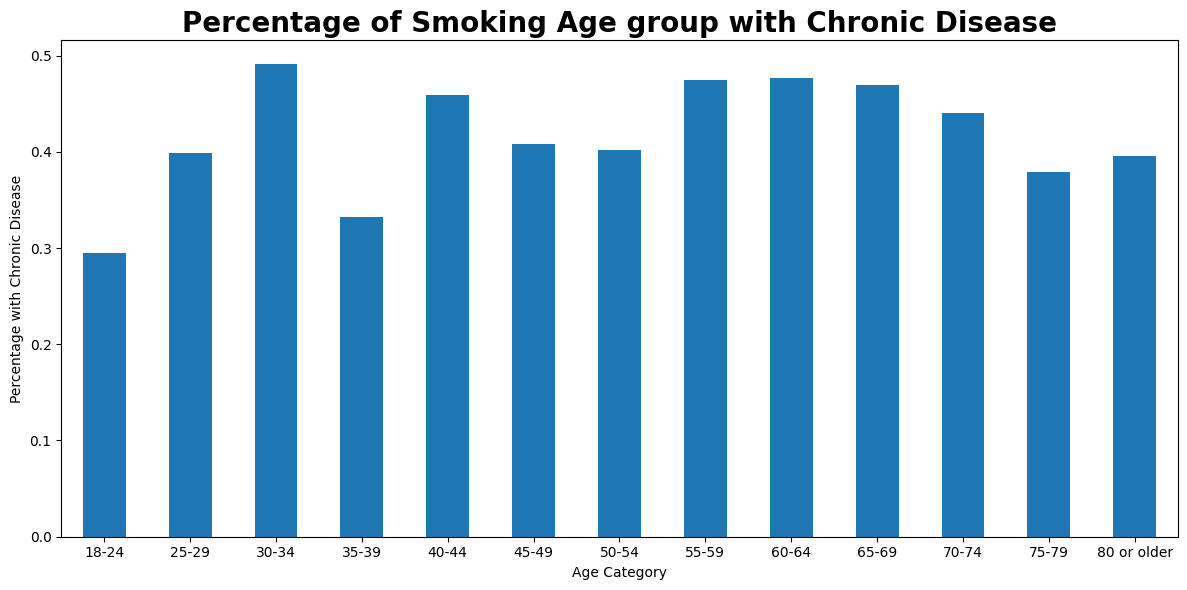

In [26]:
data=asian_df_cleaned[asian_df_cleaned['CD'] == 1]

# Assuming survey_df is your DataFrame containing the data
# Calculate the percentage of individuals with CD for each _RACE category
smoker_asthma = data.groupby('age')['smoker_status'].mean()

# Plotting
plt.figure(figsize=(12, 6))
smoker_asthma.plot(kind='bar')
plt.title('Percentage of Smoking Age group with Chronic Disease', weight = 'bold', fontsize= 20)
plt.xlabel('Age Category')
plt.ylabel('Percentage with Chronic Disease')
plt.xticks(rotation=0)  # Label x-axis ticks

plt.xticks(ticks=range(0, 13),
            labels = ['18-24','25-29','30-34'
                     ,'35-39','40-44','45-49'
                     ,'50-54','55-59','60-64'
                     ,'65-69','70-74','75-79'
                     ,'80 or older']) 
plt.tight_layout()
plt.show()

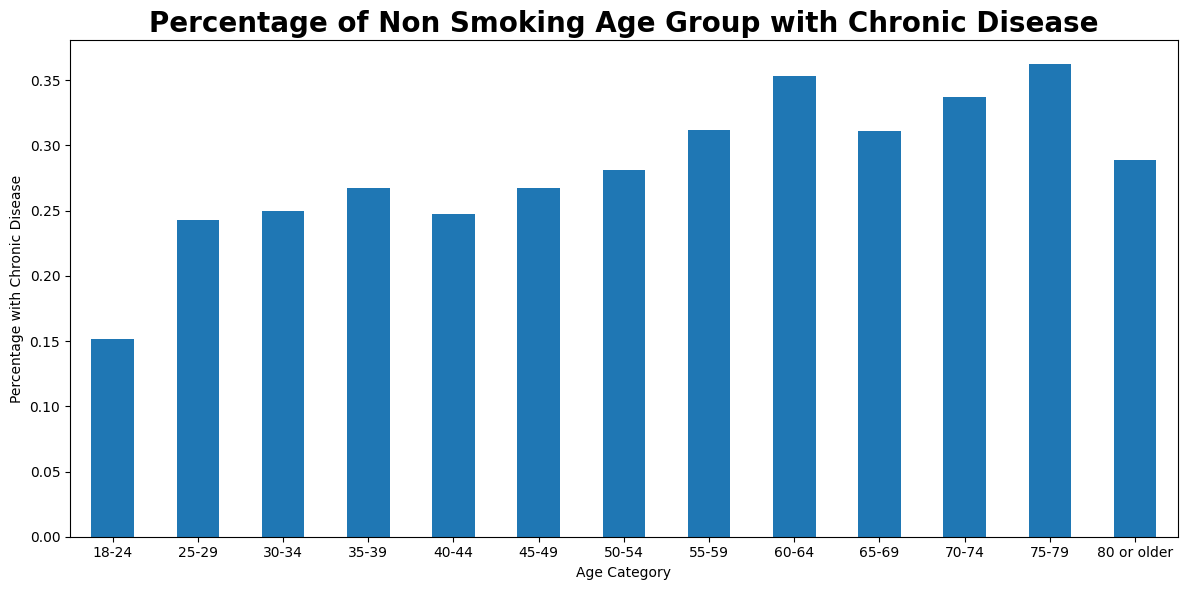

In [27]:
data=asian_df_cleaned[asian_df_cleaned['CD'] == 0]

# Assuming survey_df is your DataFrame containing the data
# Calculate the percentage of individuals with CD for each _RACE category
smoker_asthma = data.groupby('age')['smoker_status'].mean()

# Plotting
plt.figure(figsize=(12, 6))
smoker_asthma.plot(kind='bar')
plt.title('Percentage of Non Smoking Age Group with Chronic Disease', weight = 'bold', fontsize= 20)
plt.xlabel('Age Category')
plt.ylabel('Percentage with Chronic Disease')


plt.xticks(ticks=range(0, 13),
            labels = ['18-24','25-29','30-34'
                     ,'35-39','40-44','45-49'
                     ,'50-54','55-59','60-64'
                     ,'65-69','70-74','75-79'
                     ,'80 or older'], rotation = 0) 
plt.tight_layout()
plt.show()

There seems to be higher chronic disease cases for those smoking at younger age, we will filter out these group age to further analyze their smoking and other lifestyle habits

#### **4.7. EDA - Young Group Smoking Lifestyle to Chronic Disease**
---

The young group here is defined as those between the age of 18-39. This EDA is to compare the percentage of smokers having chronic disease (CD) or not having chronic disease (CD)

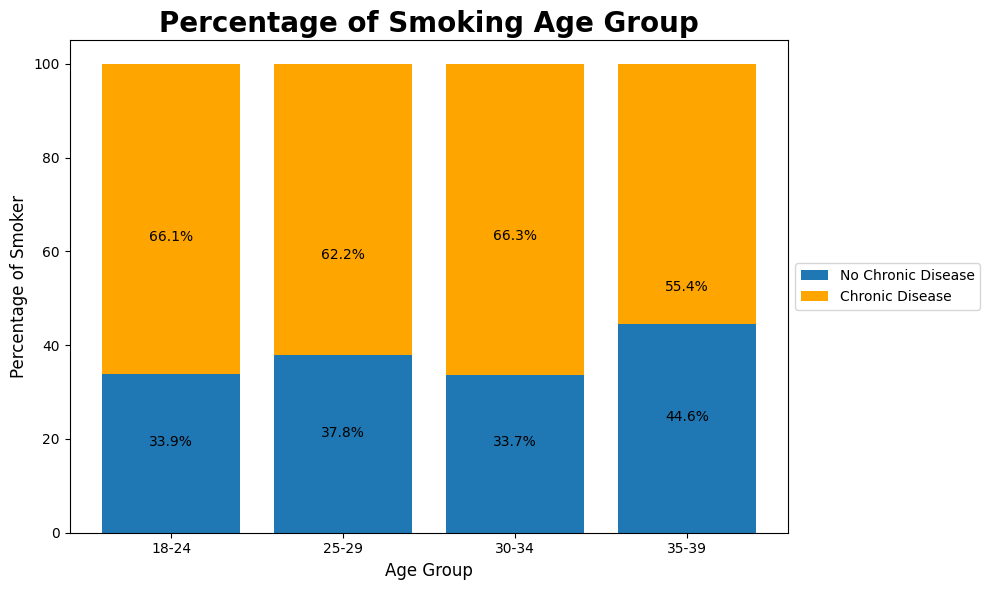

In [28]:
# Define young age dataset
young_group = asian_df_cleaned[asian_df_cleaned['age'] < 5]

# Filter data for CD = 0 and CD = 1
data_cd_0 = young_group[young_group['CD'] == 0]
data_cd_1 = young_group[young_group['CD'] == 1]

# Calculate total count for each age group within each condition
total_count_cd_0 = data_cd_0.groupby('age').size()
total_count_cd_1 = data_cd_1.groupby('age').size()

# Calculate proportion of condition 0 and 1 within each age group
proportion_cd_0 = (data_cd_0.groupby('age')['smoker_status'].mean() * total_count_cd_0) / total_count_cd_0
proportion_cd_1 = (data_cd_1.groupby('age')['smoker_status'].mean() * total_count_cd_1) / total_count_cd_1

# Calculate the sum of proportions for each age group
total_proportions = proportion_cd_0 + proportion_cd_1

# Normalize the proportions so that they sum up to 100% for each age group
proportion_cd_0_normalized = (proportion_cd_0 / total_proportions) * 100
proportion_cd_1_normalized = (proportion_cd_1 / total_proportions) * 100

# Plotting
plt.figure(figsize=(10, 6))
bar1 = plt.bar(proportion_cd_0_normalized.index.astype(str), proportion_cd_0_normalized, label='No Chronic Disease')
bar2 = plt.bar(proportion_cd_1_normalized.index.astype(str), proportion_cd_1_normalized, bottom=proportion_cd_0_normalized, label='Chronic Disease', color='orange')

plt.title('Percentage of Smoking Age Group', fontsize=20, weight='bold')
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Percentage of Smoker', fontsize = 12)

# Annotate bars with percentages
# Annotate bars with percentages for bar1 (CD = 0)
for bar in bar1:
    height = bar.get_height()
    plt.annotate(f'{height:.1f}%', xy=(bar.get_x() + bar.get_width() / 2, height/2),
                 xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', color='black')

# Annotate bars with percentages for bar2 (CD = 1)
for bar in bar2:
    height = bar.get_height()
    plt.annotate(f'{height:.1f}%', xy=(bar.get_x() + bar.get_width() / 2, height/1),
                 xytext=(0, -15), textcoords="offset points", ha='center', va='bottom', color='black')

plt.xticks(rotation=0, ticks=range(0, 4), labels=['18-24', '25-29', '30-34', '35-39'])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

Based on the plot above, comparing the group between 18-39, those that are smoking have a higher percentage of having chronic diseases compared to those non smokers. From this, we can generally say that smokers tend to have higher risk of getting chronic disease compared to non smokers

#### **4.8. EDA - Drinking Habits**

---

We will analyze on the drinking habits on each age group

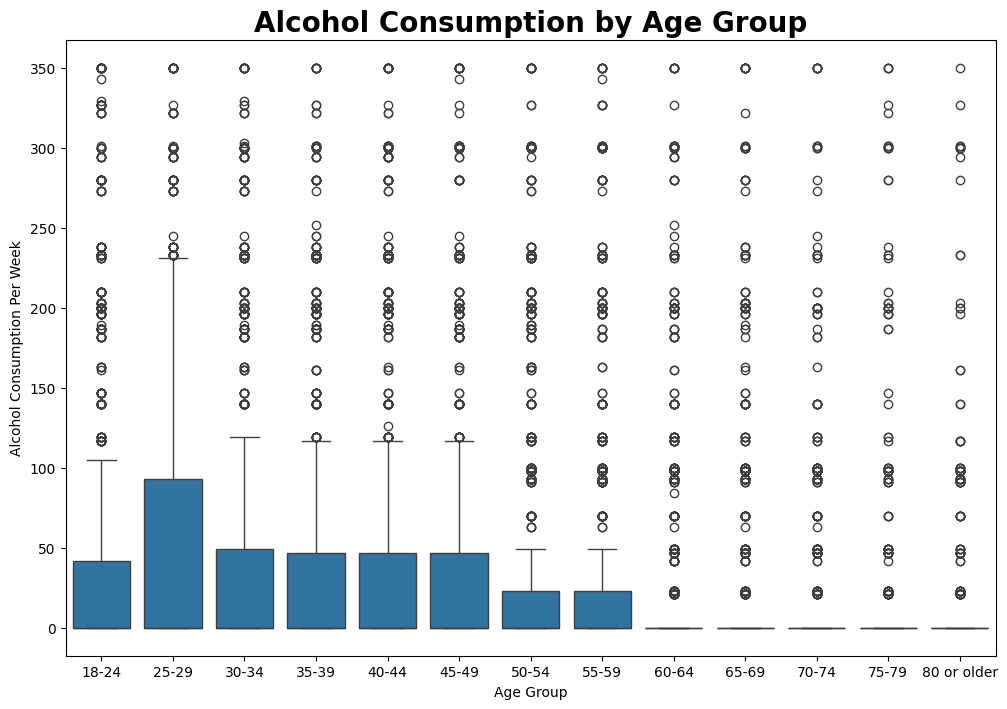

In [30]:
plt.figure(figsize=(12,8));
sns.boxplot(x = 'age', y= 'ave_drink_week', data=asian_df_cleaned);
plt.title("Alcohol Consumption by Age Group", weight = 'bold', fontsize = 20);
plt.xlabel("Age Group");
plt.ylabel('Alcohol Consumption Per Week');
plt.xticks(ticks=range(0, 13),
            labels = ['18-24','25-29','30-34'
                     ,'35-39','40-44','45-49'
                     ,'50-54','55-59','60-64'
                     ,'65-69','70-74','75-79'
                     ,'80 or older'], rotation = 0);

Analyzing the graph reveals a notable trend in alcohol consumption per week across different age groups. Specifically, individuals aged 25-29 exhibit the highest level of alcohol consumption, indicating a peak in drinking habits within this age bracket. However, as the age groups progress, starting from 50-54, there is a discernible decline in alcohol consumption trends. This downward trajectory suggests a gradual decrease in drinking habits as individuals grow older

Same as smoking lifestyle, we will analyze on the relationship between drinking and chronic disease among young groups (18-39)

In [31]:
#create age group
age_group_1 = young_group[young_group['age'] == 1] #age 18-24
age_group_2 = young_group[young_group['age'] == 2] #age 25-29
age_group_3 = young_group[young_group['age'] == 3] #age 30-34
age_group_4 = young_group[young_group['age'] == 4] #age 35-39

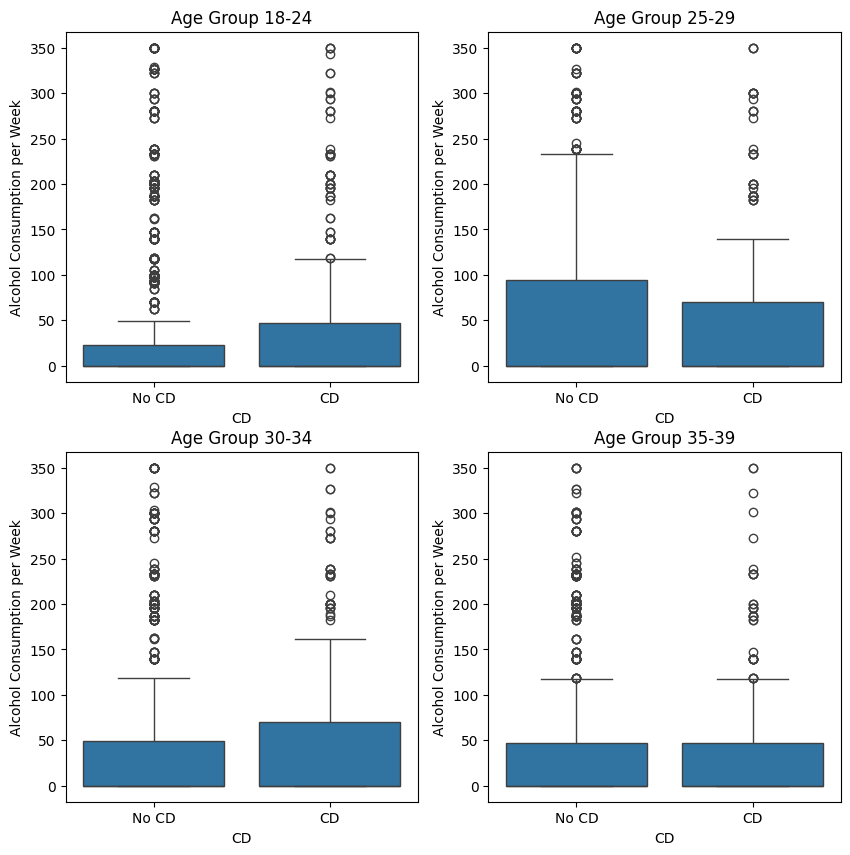

In [32]:
fig, ax = plt.subplots(2,2, figsize = (10,10))

#plot age 18-24
sns.boxplot(x = 'CD', y = 'ave_drink_week', data=age_group_1, ax = ax[0,0]);
ax[0,0].set_title("Age Group 18-24");
ax[0,0].set_ylabel("Alcohol Consumption per Week");
ax[0,0].set_xticks(ticks = [0,1], labels = ['No CD', 'CD']);

#plot age 25-29
sns.boxplot(x = 'CD', y = 'ave_drink_week', data=age_group_2, ax = ax[0,1]);
ax[0,1].set_title("Age Group 25-29");
ax[0,1].set_ylabel("Alcohol Consumption per Week");
ax[0,1].set_xticks(ticks = [0,1], labels = ['No CD', 'CD']);

#plot age 30-34
sns.boxplot(x = 'CD', y = 'ave_drink_week', data=age_group_3, ax = ax[1,0]);
ax[1,0].set_title("Age Group 30-34");
ax[1,0].set_ylabel("Alcohol Consumption per Week");
ax[1,0].set_xticks(ticks = [0,1], labels = ['No CD', 'CD']);

#plot age 35-39
sns.boxplot(x = 'CD', y = 'ave_drink_week', data=age_group_4, ax = ax[1,1]);
ax[1,1].set_title("Age Group 35-39");
ax[1,1].set_ylabel("Alcohol Consumption per Week");
ax[1,1].set_xticks(ticks = [0,1], labels = ['No CD', 'CD']);

Based on the graph, the age group of 18-24 and 30-34 CD cases tends to consume more alcoholic drinks. 

#### **4.9. EDA - Physical Activities and Nutrition Habits**
---

We will analyze on the younger group exercise and nutrition intake(based on fruits)

##### 4.9.1 Physical Activities

We will first create a column called `exercise` for EDA purpose. This column is created from feature `exercise_cat` which consists of: 
- 0 : 0 minutes of physical activities per week
- 1 : 1 to 150 minutes of physical activites per
- 2 : more than 150 minutes of physical activites per week

`exercise` column will consist of:
- 0 : `exercise_cat` = 0
- 1 : `exercise_cat` = 1 and 2

In [33]:
#create a new column called exercise
young_group['exercise'] = young_group['exercise_cat'].apply(lambda x: 1 if x != 0 else 0)

C:\Users\User\AppData\Local\Temp\ipykernel_18156\2283651289.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  young_group['exercise'] = young_group['exercise_cat'].apply(lambda x: 1 if x != 0 else 0)


In [34]:
age_group_1 = young_group[young_group['age'] == 1] #age 18-24
age_group_2 = young_group[young_group['age'] == 2] #age 25-29
age_group_3 = young_group[young_group['age'] == 3] #age 30-34
age_group_4 = young_group[young_group['age'] == 4] #age 35-39

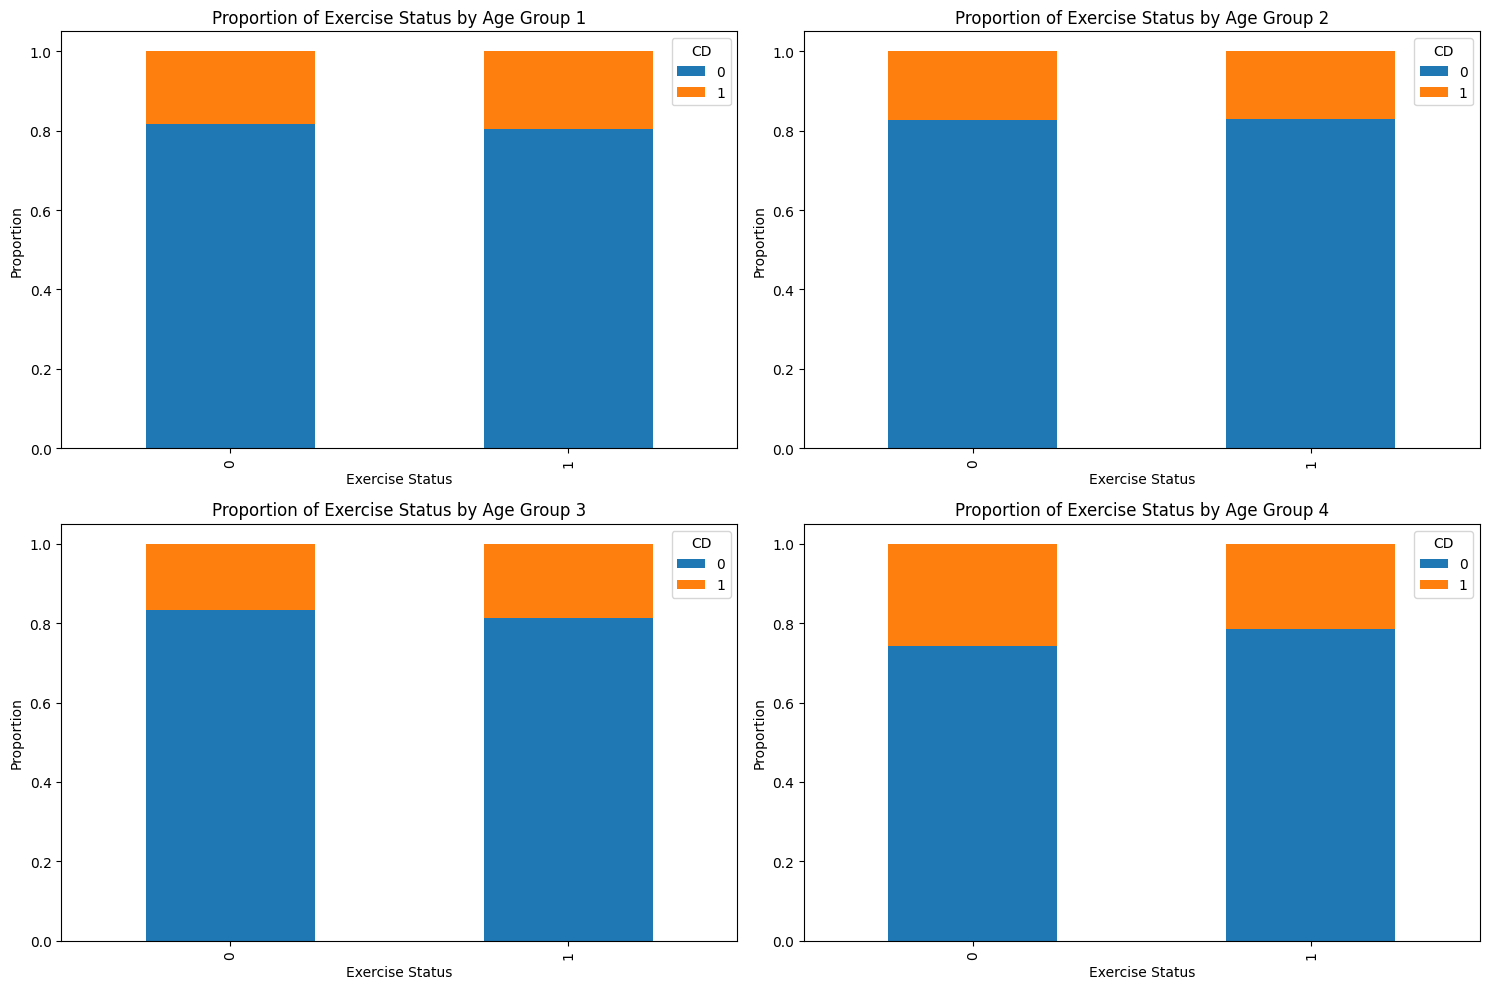

In [35]:
exercise_count_1 = age_group_1.groupby(['exercise','CD']).size().unstack()
exercise_count_2 = age_group_2.groupby(['exercise','CD']).size().unstack()
exercise_count_3 = age_group_3.groupby(['exercise','CD']).size().unstack()
exercise_count_4 = age_group_4.groupby(['exercise','CD']).size().unstack()

# Calculate total counts for each group
total_count_1 = exercise_count_1.sum(axis=1)
total_count_2 = exercise_count_2.sum(axis=1)
total_count_3 = exercise_count_3.sum(axis=1)
total_count_4 = exercise_count_4.sum(axis=1)

# Calculate proportions
proportion_1 = exercise_count_1.divide(total_count_1, axis=0)
proportion_2 = exercise_count_2.divide(total_count_2, axis=0)
proportion_3 = exercise_count_3.divide(total_count_3, axis=0)
proportion_4 = exercise_count_4.divide(total_count_4, axis=0)

# Plotting all groups together
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

proportion_1.plot(kind='bar', stacked=True, ax=axes[0, 0])
axes[0, 0].set_title('Proportion of Exercise Status by Age Group 1')
axes[0, 0].set_xlabel('Exercise Status')
axes[0, 0].set_ylabel('Proportion')

proportion_2.plot(kind='bar', stacked=True, ax=axes[0, 1])
axes[0, 1].set_title('Proportion of Exercise Status by Age Group 2')
axes[0, 1].set_xlabel('Exercise Status')
axes[0, 1].set_ylabel('Proportion')

proportion_3.plot(kind='bar', stacked=True, ax=axes[1, 0])
axes[1, 0].set_title('Proportion of Exercise Status by Age Group 3')
axes[1, 0].set_xlabel('Exercise Status')
axes[1, 0].set_ylabel('Proportion')

proportion_4.plot(kind='bar', stacked=True, ax=axes[1, 1])
axes[1, 1].set_title('Proportion of Exercise Status by Age Group 4')
axes[1, 1].set_xlabel('Exercise Status')
axes[1, 1].set_ylabel('Proportion')

plt.tight_layout()
plt.show()

##### 4.9.2 Nutrition(food) Intake

We will analyze how food consumption contributes to Chronic Disease based on young group 18-39

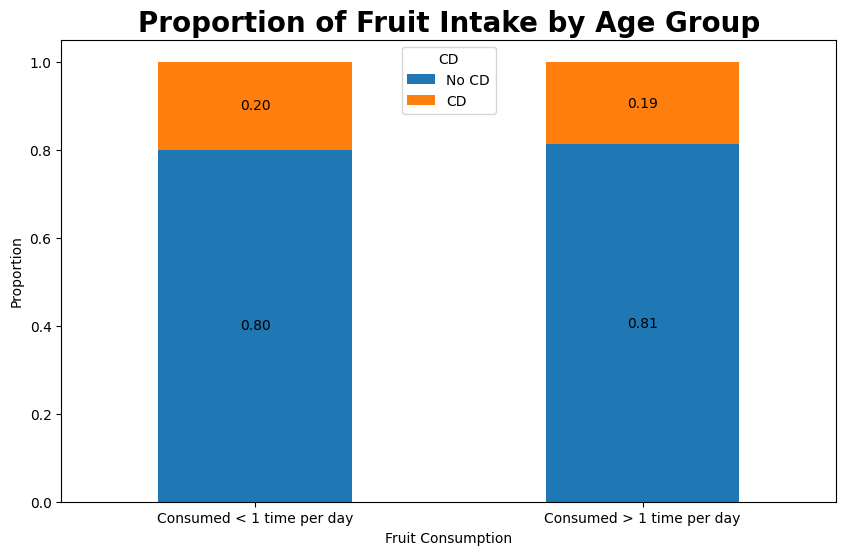

In [36]:
exercise_count_1 = young_group.groupby(['fruit', 'CD']).size().unstack()

# ax = exercise_count_1.plot(kind = 'bar', stacked=True)
total_count = exercise_count_1.sum(axis=1)

# Calculate proportions
proportion = exercise_count_1.divide(total_count, axis=0)

# Plotting the proportions
ax = proportion.plot(kind='bar', stacked=True, figsize=(10, 6))


# Adding annotations
for i in range(len(proportion)):
    for j in range(len(proportion.columns)):
        ax.annotate(f'{proportion.iloc[i, j]:.2f}', 
                    xy=(i, proportion.iloc[i, :j].sum() + proportion.iloc[i, j] / 2), 
                    ha='center', va='center')
        
plt.title('Proportion of Fruit Intake by Age Group', weight = 'bold', fontsize = 20)
plt.xlabel('Fruit Consumption')
plt.ylabel('Proportion')
plt.legend(title='CD' ,labels = ['No CD', 'CD'], loc = 'upper center')
plt.xticks(ticks = [0,1], labels = ['Consumed < 1 time per day','Consumed > 1 time per day' ], rotation = 0)

plt.show()

Based on the proportion graph, there are no significant difference between each category of fruit consumption. Therefore, we can generally say that fruit consumption does not seem to have impact on chronic disease

---
### **5. Export post-EDA Datasets for Modelling**

Export the post-EDA cleaned data frame into a CSV file to train the model in the next step

In [37]:
asian_df_cleaned_final = asian_df_cleaned.drop(columns = 'Asian')

In [38]:
asian_df_cleaned_final.to_csv('../data/03_asian_data.csv', index = False)